In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

auto = pd.read_csv("Sample Data/auto.csv")
auto.head()

,autoName,length,width,enginesize,fuel,price
0,visto,3495,1495,798,21.5,540
1,tico,3340,1400,796,21.0,550
2,Matiz,3495,1495,796,22.2,555
3,Atos,3495,1495,798,22.0,571
4,Spectra,4510,1720,1493,20.8,540


In [3]:
x = auto.iloc[:, 1:]
autoName = auto["autoName"]
autoName = list(autoName)

In [5]:
# z-standardization
from sklearn.preprocessing import StandardScaler
zx = StandardScaler().fit_transform(x)

In [7]:
# 0-1 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
z01x = scaler.fit_transform(x)

In [8]:
# 거리행렬 구하기
from sklearn.metrics import pairwise_distances
z01x_dist = pairwise_distances(z01x, metric = 'euclidean')
z01x_dist.shape

(23, 23)

In [9]:
# MDS 실행
from sklearn.manifold import MDS
cmds = MDS(n_components = 2, random_state = 0, dissimilarity = 'precomputed')
mds1 = cmds.fit(z01x_dist)
mds1_coords = cmds.fit_transform(z01x_dist)

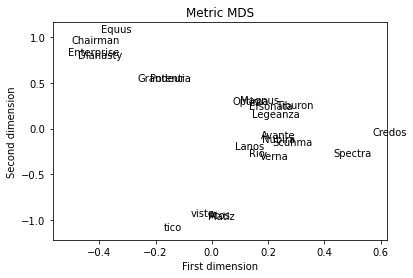

In [11]:
plt.figure()
plt.scatter(mds1_coords[:, 0], mds1_coords[:, 1], facecolors = 'none', edgecolors = 'none')
labels = autoName

# 각 케이스에 라벨 붙이기
for label, x, y in zip (labels, mds1_coords[:, 0], mds1_coords[:, 1]) :
    plt.annotate(label, (x, y), xycoords = 'data')

plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.title('Metric MDS')
plt.show()